Digit recognition based on the MNIST dataset

In [29]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from scipy import ndimage

%matplotlib inline

Load MNIST test data

In [2]:
raw_training = np.loadtxt('/notebooks/mnist/train.csv', skiprows = 1, delimiter=',')

Preprocess the raw images, normalize the training data and turn the labels into a one-hot matrix

In [3]:
pixel_depth = 255.;

def preprocess_labels(labels):
    values = np.zeros((labels.shape[0], 10));
    for i in range(labels.shape[0]):
        values[i][labels[i]] = 1.0;
    return values;

def preprocess_data(input):
    return (input - (pixel_depth / 2)) / pixel_depth


labels = preprocess_labels(raw_training[:, 0])
print(labels.shape)
data = preprocess_data(raw_training[:, 1:]).reshape(42000, 28, 28)

(42000, 10)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Visually inspect the result to make sure the transformations worked

In [5]:
print(labels[:10,:])

[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]


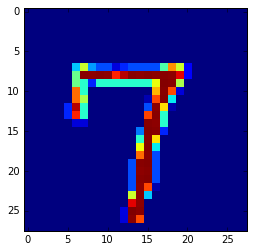

In [28]:
def show_image(index):
    plt.imshow(data[index,:,:], interpolation='nearest')
    plt.show()


Split the data into training, validation and testing sets